In [59]:
import warnings
warnings.filterwarnings('ignore')

from constants import dataset_EDA_path

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

In [65]:
df = pd.read_csv(dataset_EDA_path)
df.describe() 

,additions,deletions,changed_files,title_count,body_count,labels_count,commits_count,latency,pull_requests_neighbours_latency,pull_requests_neighbours_count
count,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000,10315.000000
mean,61.074939,32.958216,3.685894,41.963451,425.313912,1.233446,2.196219,499.698206,9974.096171,23.852545
std,152.354485,107.010937,5.394791,15.969433,1371.715284,0.875067,3.285002,469.321735,6128.928393,15.045309
min,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,110.000000,5.000000
25%,2.000000,1.000000,1.000000,31.000000,73.000000,1.000000,1.000000,66.000000,5624.500000,12.000000
50%,10.000000,3.000000,2.000000,41.000000,217.000000,1.000000,1.000000,331.000000,8975.000000,21.000000
75%,50.000000,17.000000,4.000000,51.000000,519.000000,2.000000,2.000000,917.000000,13175.000000,32.000000
max,1953.000000,1769.000000,49.000000,146.000000,64124.000000,8.000000,50.000000,1440.000000,47312.000000,132.000000


In [61]:
def plot_feature_importance(model, X):
    features_name = X.columns.values
    y_pos = np.arange(len(features_name))

    _, ax = plt.subplots()

    ax.set_yticks(y_pos)
    ax.set_yticklabels(features_name)
    ax.barh(y_pos, model.feature_importances_);

### Regression analysis 

RMSE: 450.0 minutes
RMSE: 7.5 hours


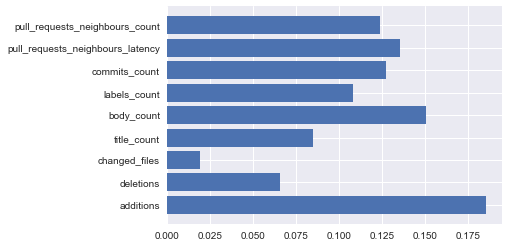

In [62]:
y = df.latency
X = df.drop(['latency'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

model = XGBRegressor(n_estimators=1000, learning_rate=0.1, booster='gbtree', max_depth=3, min_child_weight=1)
model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(test_X, test_y)], verbose=False)

rmse = round(np.sqrt(mean_squared_error(test_y, model.predict(test_X))))
print(f"RMSE: {rmse} minutes")
print(f"RMSE: {rmse/60} hours")
plot_feature_importance(model, X)

### Categorical analysis

Accuracy: 0.6 %


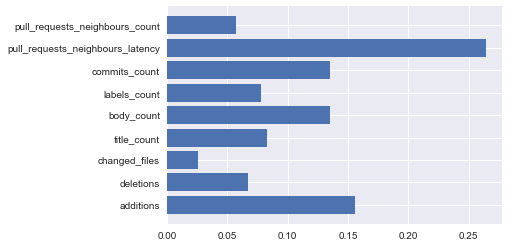

In [63]:
normalized_latency = (df['latency'] / (df.pull_requests_neighbours_latency / df.pull_requests_neighbours_count)).values
df['normalized_latency'] = [0 if x < 1 else 1 for x in normalized_latency]

y = df.normalized_latency
X = df.drop(['latency', 'normalized_latency'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

model = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, min_child_weight=1)
model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(test_X, test_y)], verbose=False)

acc = round(accuracy_score(test_y, model.predict(test_X)), 2)
print(f"Accuracy: {acc} %")
plot_feature_importance(model, X)